***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [7. Observing Systems](0_introduction.ipynb)  
    * Previous: [7.2 The Radio Interferometer Measurement Equation (RIME)](7_2_rime.ipynb)  
    * Next: [7.4 Digital Correlators](7_4_digital.ipynb)

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
from IPython.display import Image
import scipy.signal

In [3]:
HTML('../style/code_toggle.html')

***

## 7.3 模拟电子（G-Jones 与B-Jones） Analogue Electronics (G- and B-Jones)

本章第一节，我们引入了琼斯概念和射电干涉测量方程RIME。这些概念一直都很抽象，主要用于对观测系统进行数学描述。本章后面的内容，我们将探索不同仪器效应的细节，相应的琼斯矩阵，以及对天空信号的影响。我们的终极目标--复原原始的天空信号--需要知道观测系统的信息。对观测系统效应理解的深度决定了我们对真实天空信号的复原精度。下一章将讨论校准过程。

In the first sections of this chapter, we introduced Jones notation and the Radio Interferometric Measurement Equation (RIME). These ideas have been presented abstractly, as a way to lay out the mathematics of how we describe observing systems. For the remainder of the chapter, we will explore the details of different instrumental effects, their corresponding Jones matrices, and how these effects alter the sky signal. Our ultimate goal - recovering the original sky signal - requires knowledge of the observation system. How well we understand an observing system affects how accurate we can recover the true sky signal. We will discuss the process of calibration in the next chapter.

在[$\S$ 7.2.3 &#10142;](./7_2_rime.ipynb)，我们引入了方向依赖跟方向独立效应概念（DDE和DIE）。历史上，观测中主要关注方向独立效应，主要原因在于方向独立效应比较简单，而且是影响天空信号的主要效应，除此之外，还受限于硬件和阵列本身。方向独立效应发生在天空电场转换成电压的过程（即馈源），以及望远镜和阵列的电子器件间的传导。通常，所有的方向独立效应都用一个增益（gain）琼斯矩阵表示，称为$\mathbf{G}$-Jones，它由多种效应构成，主要源于模拟电子器件，如过滤器、放大器、混合器、电缆等。本节将会讨论到这些内容。

In [$\S$ 7.2.3 &#10142;](./7_2_rime.ipynb) we introduced the concepts of direction-dependent and direction-independent effects (DDE's and DIE's). Historically, direction-independent effects were the primary concern during observations. This was mainly due to simplicity, hardware and array limitations, and because DIE's are the dominant effects on the sky signal. These effects occur upon conversion of the sky's electric field to a voltage - i.e. at the feed - and propagates through the telescope and array electronics. Typically, all the DIE's are wrapped up into a single 'gain' Jones matrix called the $\mathbf{G}$-Jones. This term is made up of numerous effect, primarily due to the analogue electronic components such as filters, amplifiers, mixers, cables, etc. This will be discussed in this section.

还有一种DIE琼斯矩阵，即“带通bandpass”或$\mathbf{B}$-Jones，跟$\mathbf{G}$-Jones有关。我们在[$\S$ 7.1 &#10142;](.s/7_1_jones_notation.ipynb)已经讨论过，琼斯矩阵是时间跟频率的函数，但是，通常把模拟电子效应近似分成两类，一类是频率变时间不变函数（带通），一类是时间变频率不变函数（增益）。因此，总的时间和频率依赖的增益矩阵$\mathbf{G}'$为

Often, there is a second DIE Jones matrix, the *bandpass* or $\mathbf{B}$-Jones which is related to the $\mathbf{G}$-Jones. As we have discussed in the [$\S$ 7.1 &#10142;](.s/7_1_jones_notation.ipynb) a Jones matrix is a function of time and frequency. But, it is often a good approximation to think of the analogue electronics effects as separable into a frequency-variable, time-stable function (the bandpass) and a time-variable, frequency-stable function (gain), such that the total, time- and frequency-dependent gain matrix $\mathbf{G}'$ is

$$
\mathbf{G}'(t, \nu) \approx \mathbf{G}(t) \cdot \mathbf{B}(\nu) 
$$

令人困惑的是，在文献跟软件中，$\mathbf{G}$既可以是时变项，也可以是时变跟频变项，取决于作者的定义。切记切记！这里的要点在于，$\mathbf{G}$项是所有琼斯项中，对观测信号影响最大的项。这也是我们从琼斯项开始讨论的原因。

Confusingly, in the literature and software, $\mathbf{G}$ can be either a time-dependent or time- and frequency-dependent term, depending the author's personal definition. Keep this in mind! The most important point here is that the $\mathbf{G}$ term has the biggest impact on the observed signal, out of all the Jones terms. This is why we will start with it.

### 7.3.1 理想源 An Idealized Source<a id='instrum:sec:7_3_1'></a>

我们暂时忽略干涉测量，只看看单个射电源。如果天空只有一个源，我们会观测到什么呢？假定源本身的流量为$I$（单位Janskys），普指数为$\alpha$，则$I$为：
Let us ignore interferometry for now, and consider a single radio telescope. For a simple sky containing only a single source, what would we expect to observe? The source should have some intrinsic flux $I$ (measured in Janskys) and some spectral index $\alpha$ of the form

$$
I(\nu) = I_0 \left( \frac{\nu}{\nu_0} \right)^{-\alpha}
$$

$I_0$是该源在某个参考频率$\nu_0$的流量。鉴于大多数射电源在其漫长生命周期中都较稳定，短时间内其流量不会发生显著变化。尽管我们所测量的是时域信号，我们仍然可以把覆盖该频段的频谱看成是我们目前最终想要研究的目标。下图是一个反映源的流量随着时间和频率变化的“瀑布图”：

where $I_0$ is the source's flux at some reference frequency $\nu_0$. We think of most radio sources as being stable over long lifetimes. The source flux will thus not change noticably over short periods of time. Though the signal we are measuring is a time-domain signal, we will look at the frequency spectrum throughout this sectionL frequency is what we are ultimately interested in for now. If we were to plot the source's flux as a function of time and observing frequency in a *waterfall plot*, it would look like the figure below:

In [4]:
# Setup an ideal source coherency spectrum
nchans = 512 # number of frequency channels
freq0 = 1.1e9 # start frequency (Hz) (centre of first channel)
freq1 = 1.5e9 # stop frequency (Hz) (centre of last channel)
freqs = np.linspace(freq0, freq1, nchans)
ntime = 500

I0 = 1. # flux at reference frequency (Jy)
nu0 = 1.421e9 # reference frequency (Jy)
alpha = -0.25 # source spectral index
Inu = lambda nu: I0 * (nu/nu0)**alpha # Stokes I spectrum

# Stokes Parameters
I = Inu(freqs)
Q = np.zeros_like(I)
U = np.zeros_like(I)
V = np.zeros_like(I)

# Compute the polarisation values
brightness = np.empty(shape=(nchans, 2, 2), dtype=np.complex128)
brightness[:,0,0] = I + Q
brightness[:,0,1] = U + V*1j
brightness[:,1,0] = U - V*1j
brightness[:,1,1] = I - Q

brightness = np.tile(brightness[np.newaxis], [ntime, 1, 1, 1])

/Users/denghui/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,0.98,'Idealized Source Spectrum')

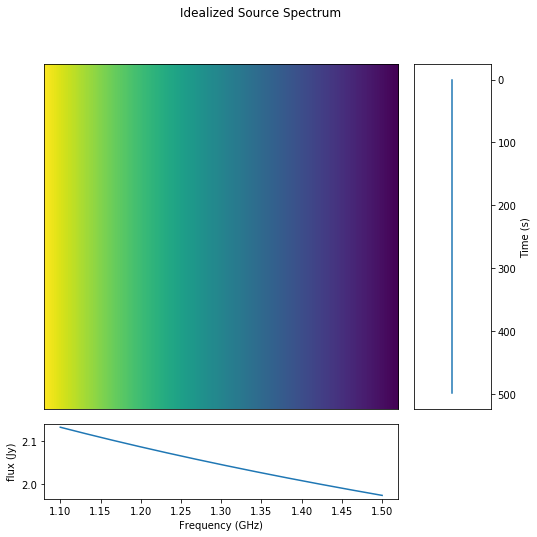

In [5]:
fig, axes = plt.subplots(figsize=(8,8))

ax1 = plt.subplot2grid((5,5), (0,0), colspan=4, rowspan=4)
plt.imshow(np.abs(brightness[:,:,0,0]+brightness[:,:,1,1]), aspect='auto')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2 = plt.subplot2grid((5,5), (4,0), colspan=4, rowspan=1)
plt.plot(freqs/1e9, brightness[10,:,0,0]+brightness[10,:,1,1])
plt.ylabel('flux (Jy)')
plt.xlabel('Frequency (GHz)')

ax3 = plt.subplot2grid((5,5), (0,4), colspan=1, rowspan=4)
plt.plot(brightness[:,10,0,0]+brightness[:,10,1,1], np.arange(brightness.shape[0]))
ax3.get_xaxis().set_visible(False)
ax3.invert_yaxis()
ax3.yaxis.tick_right()
plt.ylabel('Time (s)')
ax3.yaxis.set_label_position('right')

plt.suptitle('Idealized Source Spectrum')

下图展示了某时刻的频谱，右图展示了某频率的流量随时间变化。我们想要探测的源是稳定源，当然，事实上没那么简单。。。我们所造的任何系统都不可避免会引入噪声，而且，正如我们之前提到过的，测量系统会改变原始信号！事实上，我们得不到这样完美理想的测量结果，后面会给出一个模拟前端例子，帮助我们理解观测到的谱不同于原始谱的原因。

The bottom plot shows the spectrum for a single moment in time, and the plot on the right shows the flux at a single frequency. The source is stable in time and frequency. This is what we would like to detect. Of course, things are not so simple in practice...any system we build will introduce noise into the measurement. Furthermore, as we have hinted at, our measurement systems alters the original signal! Instead of this nice, ideal measurement we then see something like the waterfall plot at the end of this section. We will step through the various stages of an example analogue front-end to understand why the observed spectrum differs from the original source spectrum.

### 7.3.2 系统噪声与灵敏度 System Noise and Sensitivity

所有测量系统都有噪声。事实上，任何不为绝对零度的物体都有能量，并以热的形式辐射。热的另一个术语为噪声。我们感兴趣的是测量信号。如果系统引入了太多噪声，就还原不出原始信号。当我们讨论望远镜“灵敏度”的时候，我们主要关注的是在测量过程中，系统会引入多少噪声。这种“系统噪声”来自望远镜的电子器件，跟望远镜的设计（天线馈源、天线等）以及天空信号有关。新的电子元件噪声较低，因此望远镜经常会更新。

All measurement systems have noise. In fact, anything which is not at absolute zero (i.e. everything) has some energy, which is radiated as heat; another term for heat is noise. We are interested in measuring some signal. If our system introduces too much noise into the measurement, then we can not recover the original signal. When we discuss the *sensitivity* of a telescope, we are primarily interested in how much noise the system adds during measurement. This *system noise* is, among other things, a result of electronic components, the telescope's engineering design (antenna feed, dish design, etc.), and sky signals. Newer electronic components tend to have lower noise characteristics than older systems. Telescopes are thus often upgraded with newer systems.

#### 噪声温度 Noise as Temperature

常常用温度来讨论噪声。噪声源于热，热用温度度量。从电子学的角度来讲，我们可以把信号看成是电路里的电压，那么信号就是Johnson-Nyquist噪声源，该噪声源的功耗为：

It is very common to discuss noise in terms of temperature. Noise is a consequence of heat, and heat is measured as a temperature. From an electronics perspective, we can consider a signal as a voltage in an electrical circuit. The signal is then a Johnson-Nyquist noise source, and the power dissapated by that noise source is:

$$P = k_B T \Delta \nu$$

这里，$P$是电压信号的功率，$k_B$是玻尔兹曼Boltzmann常数，$T$是开尔文温度，$\Delta \nu$是信号带宽，单位为赫兹。文献中，射电望远镜的噪声功率常常用温度进行描述：

Where $P$ is the power of the voltage signal, $k_B$ is the Boltzmann constant, $T$ is temperature in Kelvin, and $\Delta \nu$ is the bandwidth of the signal in Hertz. The noise power of a radio telescope (or a thereof) is thus often described in the literature in terms of a temperature

$$T = \frac{P}{k_B \Delta \nu}$$

#### 系统温度 System Temperature

为了确定望远镜的灵敏度，必须首先了解其噪声性质，然后才知道该望远镜是否能探测到我们想要的信号。首先用一些温度来定义望远镜的噪声性质，这就是“系统温度”，由多种成分构成：

If we want to determine a telescope's sensitivity, we must first understand its noise characteristics. We can then decide if it is possible to detect the signal we are after. We start by assuming that there is some temperature which defines our telescope's noise characteristics. As you might expect, this is the *system temperature*, and is made up of multiple components

$$ T_{\textrm{sys}} = T_{\textrm{sky}} + T_{\textrm{atmosphere}} + T_{\textrm{spillover}} + T_{\textrm{rx}} + \ldots$$

$T_{\textrm{sky}}$是来自天空的随机信号，在L-band (1.4 GHz)，天空温度约为10K，其中2.73K来自宇宙微波背景（CMB）。观测频率不同，天空温度不同，在低频，比如100MHz，天空温度接近1000K，这主要是同步加速器辐射。地球“室温room remperature”约为300K。如果天空噪声显著高于室温，建造低噪声仪器显然没有多少价值。

where $T_{\textrm{sky}}$ is the stochastic signal from the sky. In the L-band (1.4 GHz) the sky temperature is approximately 10 K, 2.73 K of which are from the Cosmic Microwave Background (CMB). The sky temperature varies depending on the observing frequency,: at low frequency - say 100 MHz -, for example, the sky is close to 1000 K . This is primarily due to synchrotron radiation. We can approximate a 'room temperature' on Earth as 300 K. If the sky noise is significantly 'hotter' than room temperature, then there is clearly little advantage to building instruments with low noise characteristics.

根据观测频率的不同，一部分噪声也归因于大气层和电离层：$T_{\textrm{atmosphere}}$。这种噪声源于自然，不能视为观测系统的一部分。如果望远镜位于月球，就不会由大气噪声。进一步的传导效应细节会在[$\S$ 7.7 &#10142;](7_7_propagation_effects.ipynb)讨论到。在L-band，这种噪声效应较低($\sim 1$ K)，后面要讨论到的相位旋转效应要严重得多。

Depending on the observing freqency, a component of noise is also due to the atmosphere and ionosphere: $T_{\textrm{atmosphere}}$. Though this noise is "natural", we nevertheless treat it as part of the observing system. If our telescope was placed on the moon, then there would be essentially no atmospheric noise. Further details of various propagation effects are given in [$\S$ 7.7 &#10142;](7_7_propagation_effects.ipynb). In the L-band this is a small noise effect ($\sim 1$ K); the phase rotation effects discussed later in the chapter are a much more serious effect.

地球是一个300K的黑体辐射源，即一个很热的噪声源。我们要对来自地球的噪声（“地噪声”）进入观测系统之前加以阻止。有两种方法：冷却电子设备，或者孤立系统。地噪声进入系统的一种方式是通过主波束的照明模式，后面[$\S$ 7.5 &#10142;](7_5_primary_beam.ipynb)会讨论到主波束的内容。到目前为止，重点关注望远镜光学系统产生的“波束beam”，波束对天空位置敏感。光学系统设计成对天线所指方向最敏感，但是不可避免地，在其它方向也总是存在一定的敏感性。因此，无论望远镜指向哪个方向，总会对地噪声存在一定敏感性。当望远镜指向水平面，波束对地噪声将更为敏感。这被叫做“溢出噪声spillover noise” $T_{\textrm{spillover}}$。如果总的溢出噪声达到几个百分点量级，会产生10K量级的噪声。

The Earth is a 300 K black-body radiation source, i.e. a very hot noise source. We would like to block the noise from the earth (known as *ground noise*) before it enters our measurement system. This can be done in two ways: cooling the electronics, and/or isolating the system. One way the ground noise enters the system is from the primary beam's illumination pattern. We will discuss primary beams later [$\S$ 7.5 &#10142;](7_5_primary_beam.ipynb). For now, what matters is that the telescope optics produce a 'beam', which is sensitive to all locations on the sky. The optics are designed such that the beam is most sensitive to the direction towards which the dish is pointed, but there is always some sensitivity in other directions. Thus, no matter where we point the telescope, it is always sensitive - to some extent - to signal from the ground. If the telescope is pointed low on the horizon, an even more sensitive section of the beam will be pointed at the ground. This is called *spillover noise* $T_{\textrm{spillover}}$, and is a pointing direction-dependent noise term. If the integrated spillover is on the order of a few precent, this can result in noise of the order of 10's of Kelvin.

系统温度的最后一项是接收机噪声：$T_{\textrm{rx}}$。这是电子元件把微弱的天空信号转换成可记录的数字信号时所引入的一种噪声。KAT-7和MeerKAT望远镜的接收机噪声约为20K。本节将在后面讨论模拟接收机系统。

The final term of note in the system temperature is the receiver noise: $T_{\textrm{rx}}$. This is the noise introduced into the measurement by the analogue electronics used to convert the weak sky signal into a digital signal which can be recorded. A KAT-7 or MeerKAT telescope produce approximately 20 K in receiver noise. We will discuss the analogue receiver system further in the rest of this section.

#### 辐射计方程  Radiometer Equation

对于单个射电望远镜，当其某个带宽指向天空某个方向时，用“辐射计radiometer”来度量它的平均功率。所测量到的噪声信号呈高斯分布，其误差可以用“理想辐射计方程 ideal radiometer equation”来描述：

For a single radio telescope, the measurement of the average power over some bandwidth for a direction in the sky is done with a *radiometer*. Given that the noise signal we are measuring is approximately Gaussian, the error of the measured signal can be described by the *ideal radiometer equation*

$$
\sigma_{T} = \frac{T_{\textrm{sys}}}{\sqrt{\Delta\nu \tau}}
$$

$\sigma_{T}$是测得噪声温度的标准差。辐射计方程描述了，一个理想系统在给定系统温度($T_{\textrm{sys}}$)下观测一个宽带源，要达到给定的噪声水平($\sigma_{T}$)所必须的带宽($\Delta \nu$)和积分时间($\tau$)。

where $\sigma_{T}$ is the standard deviation of the measured noise temperature about the true noise temperature. The radiometer equation describes the necessary bandwidth ($\Delta \nu$) and integration time ($\tau$) required to reach a desired noise level ($\sigma_{T}$) for an ideal system with a given system temperature ($T_{\textrm{sys}}$) when observing a broadband source.

从上述方程我们可以看出，系统温度的线性降低会导致$\sigma_{T}$的线性减小，带宽跟积分时间的线性增加，会导致$\sigma_{T}$的方根改善。例如，有两个相同带宽$\Delta \nu$的系统，一个的系统温度是另外一个系统的两倍，即$T_{\textrm{sys,0}} = 2 T_{\textrm{sys,1}}$，那么，$T_{\textrm{sys,0}}$要想达到跟$T_{\textrm{sys,1}}$同样的灵敏度，必须消耗4倍的积分时间。

From the radiometer equation we can see that a linear decrease in system temperature will lead to a linear reduction in $\sigma_{T}$. A linear increase in the bandwidth or intergration time only leads to square-root improvement in $\sigma_{T}$. For example, If there are two systems, with the same bandwidth $\Delta \nu$, in which one has a system temperature twice that of the other, i.e. $T_{\textrm{sys,0}} = 2 T_{\textrm{sys,1}}$, then $T_{\textrm{sys,0}}$ will take 4 times longer to reach the same sensitivity as $T_{\textrm{sys,1}}$.

上面的辐射计方程适用于理想系统，现实的模拟系统不稳定会引入“增益波动gain fluctuations“。这些波动由多种因素引起：电子设备的物理温度，交叉耦合泄漏，RF屏蔽，等等。这些因素决定了观测系统的稳定性，增益波动跟时间和频率有关。

The radiometer equation above holds for an ideal system, but real-life analogue systems are unstable and introduce 'gain fluctuations'. These fluctuations are due to a number of effects: the physical temperature of the electronics, cross-coupling leakage, RF shielding, etc. The system stability over an observation will depend on how well these effects are managed. These gain fluctuations depend on both time and frequency.

#### 系统等效通量密度（SEFD）System Equivalent Flux Density (SEFD)

射电望远镜的总体灵敏度由“系统等效通量密度”（SEFD）来描述，SEFD是仪器的噪声($T_{\textrm{sys}}$)与有效信号“gain” $G_{eff}$的比率。 在这里，“增益gain”是我们感兴趣的天空信号的所有各种放大和衰减的统称。SEFD正式定义为：

The overall sensitivity of a radio telescope is described by the *system equivalent flux density* (SEFD) which is a ratio of the noisiness of the instrument ($T_{\textrm{sys}}$) to the effective signal *gain* $G_{eff}$. Here, "gain" is a catch-all term for all the various amplifications and attenuations of the sky signal we are interested in. Formally the SEFD is defined as

$$
\textrm{SEFD} = \frac{T_{\textrm{sys}}}{G_{eff}} = \frac{2 k_B \eta T_{\textrm{sys}}}{A_{eff}}
$$

其中$k_B$是玻尔兹曼常数，$\eta$是通用效率因子（总是“大于”1-不是错字！，用于表示望远镜在各个系统温度分量里的信号损失（例如，碟形天线表面效率低下 ，馈源进光不足，量化等），$A_{eff}$是望远镜的有效收集区域。 对于碟形望远镜，$A_{eff}$可以近似为碟形的几何表面积。

where $k_B$ is the Boltzman constant, $\eta$ is an generic efficiency factor (always *greater* than 1 - not a typo!) used to represent the signal loss in various system temperature components of the telescope (e.g. dish surface inefficiencies, feed under-illumination, quantization, etc...), and $A_{eff}$ is the effective collecting area of the telescope. For a dish telescope $A_{eff}$ can be approximated, to first order, as the geometric surface area of the dish.

SEFD越小，望远镜的灵敏度越高。

A decrease in the SEFD is equivalent to an improvement in the sensitivity of the telescope.

### 7.3.3 模拟接收机前端 Analogue Receiver Front-End

为了更好地理解系统温度和增益，我们首先需要了解“模拟接收机前端”，也叫模拟链。这是一组模拟电子组件，用于调节微弱的天空信号，以便进行数字计算（如相关）。理想情况下，出于多种原因，我们更喜欢数字信号。因为数字信号是可预测的，并且计算具有确定性。比起模拟信号，对数字信号执行诸如傅立叶变换和相关操作要更为容易。连续性是模拟信号的一个优点：不存在由奈奎斯特采样或混叠所引起的问题。但是，模拟组件会受到反馈，串扰，温度和供电的影响。最糟糕的是，模拟组件会将噪声引入信号中！通常，模拟组件在不同时间和频率上会产生不同的响应，而数字系统响应在时间和频率上具有稳定性。

To understand the details of the system's temperature and gain, we need to start with the *analogue receiver front-end*, also known as the analogue chain. This is the set of analogue electronic components which are used to condition the weak sky signal in order to do digital computations (like correlation). Ideally, we prefer a digital signal for a number of reasons. Digital signals are predictable, and any computation is deterministic. It is easier to perform operations such as Fourier transforms and correlations on digital signals than to analogue signals. An advantage of analogue signals is that they are continuous: they are free of issues due to Nyquist sampling or aliasing. Analogue components, however, are affected by feedback, cross-talk, temperature, and power supplies. Worst of all, analogue components introduce noise into the signal! In general, analogue components produce variable response in time and frequency, whereas a digital system has a stable response in time and frequency.

接收到天空信号以后，我们希望能尽快将其数字化。 不幸的是，天空信号非常微弱，在将其转换为数字信号之前需要进行放大和调节。 “模数转换器”（ADC）将模拟信号转换为数字信号，但是如果信号太弱，则ADC将无法对模拟信号进行采样。下图是一个模拟前端的例子。

We would like to digitize our sky signal as soon as possible. Unfortunately, the sky signal is very weak, and needs to be amplified and conditioned before it can be converted to digital. The *analogue-to-digital converter* (ADC) transforms an analogue signal to a digital signal, but if the signal is too weak then the ADC cannot sample the analogue signal. Below is a block diagram of an example analogue front-end.



*Amplification* is the effect of increasing the strength of a signal absolutely or relative to another signal. In electronics an amplifier might be used for this, but other forms of amplification are possible, e.g. building a larger dish to collect more signal. The opposite effect is called *attenuation*. All Jones matrices can be thought of as performing an amplification or attenuation on the input signal to produce the output signal. This amplification (attenuation can also be seen as an amplification less than 1) can be complex or real-valued, and a function of time, frequency, or direction. Some Jones matrices will have unity gain, e.g. a rotation transform. Signal *conditioning* is the application of different filters to select out a limited signal of interest.

<img src='figures/analogue_chain.svg' width=800>

**Figure 7.3.1**: Block diagram example of an analogue receiver front-end for a radio telescope. A current is induced in the receptor by the electric field of the sky source. The resistance of the components creates a voltage which is propotional to the amplitude of the electric field. This voltage is amplified by a low noise amplifier (LNA) in a cryostat at 20 K. A second stage amplifier further amplifies the signal in a 70 K intermediate cryostat. The signal is bandpass filtered to select the band of interest. A bandstop filter is used to filter out frequencies with radio frequency interference (RFI). A local oscillator (LO) is mixed with the signal to down mix the original radio frequency (RF) to an intermediate frequency (IF) which is then digitized by an analogue-to-digital converter (ADC). <a id='instrum:fig:analogue_chain'></a><!--\label{instrum:fig:analogue_chain}-->

The electric field of the sky signal induces a current on the *receptor* (also known as a *feed*). We will discuss feeds in [$\S$ 7.4 &#10142;](7_6_polarization.ipynb). This is a very weak signal: we need to use an amplifier to increase the strength of the signal. The process of amplification introduces noise, which we would like to minimize. As technology improves, the noise introduced by amplifiers has decreased. The common method to reduce the noise of an amplifier is by cooling it using a *cryostat*. This is a chamber placed under vacuum, which can be cooled down to very low temepratures (20 K if using liquid helium, 70 K for liquid nitrogen). Remember - noise and temperature are the same, so the lower the temperature, the lower the noise. This special amplifier is called a *low noise amplifier* (LNA), and is usually the main component of the system noise. When building a telescope system, we focus on making sure the LNA has the best possible noise performance (i.e. the LNA is a significant cost to the analogue front end).

The idea of the LNA is that we have a weak signal which needs to be amplified while adding the smallest possible amount of noise into the signal. Once the signal has been amplified with the LNA, we can use normal amplifiers and apply filters, because the signal to noise ratio is now sufficiently large that the added noise from these components will not affect the original signal very much. This can be seen in the receiver temperature equation.

$$ T_{\textrm{rx}} = T_{\textrm{feed}} + \frac{T_{\textrm{passive}}}{G_{\textrm{feed}}} + \frac{T_{\textrm{LNA}}}{G_{\textrm{feed}} G_{\textrm{passive}}} + \frac{T_{\textrm{amp}}}{G_{\textrm{feed}} G_{\textrm{passive}} G_{\textrm{LNA}}} + \ldots$$

where the $T$ terms are the additional noise temperatures introduced by each component, and $G$ is the 'gain' term  - which can be less than 1 (attenuation) or greater than 1 (amplification). The gain from the feed and passive components will be less than 1, and are similar to an efficiency term in when discussing the primary beam. These will cause the temperature from these components to increase in the system temperature <span style="background-color:cyan">etienne: what does this mean, what "these"? Efficiencies?</span>. By placing the LNA as soon as possible, we see that the weak sky signal is amplified and noisier components - such as filters and second stage amplifiers - can be introduced without drowning the sky signal in their noise.

From the receiver temperature equation above, we can see that each additional temperature term includes the gain of the LNA in the denominator. Thus, the more gain is introduced by the LNA, the smaller each additional noise term. There are some noise terms which come before the LNA stage. There is always a feed temperature $T_{\textrm{feed}}$ (any physical feed will have some resistance - else, there would be no current!). There are passive components such as cables, orthomode transducers (OMTs), waveguides etc. which all add a noise component $T_{\textrm{passive}}$.

#### Decibel Units

As a quick aside, it is common to discuss electronic and system gain using logarithmic decibel units. This is worth a quick review. We usually describe a signal in linear units. It is often more intuitive, however, to use logarithmic units when discussing values which cover many orders of magnitude, such as in electronics. The standard unit to use is the *decibel*, which is defined (for a power $P$) as:

$$
P_{dB} = 10 \log_{10} \left ( \frac{P}{P_0} \right )
$$

where $P_0$ is the reference power, typically set to unity. Important values to remember are: 3 dB is a factor of 2 increase, 10 dB is a factor of 10, -3 dB is a factor of 0.5. Every factor of 10 increase in decibels is an order of magnitude increase. Note that if the signal is not a power (e.g. it is a voltage or electric field) the definition of decibel is

$$
P_{dB} = 20 \log_{10} \left ( \frac{V}{V_0} \right )
$$

as we need to compute the power of the voltage in the process of converting to decibels. This is useful for describing the response of Jones matrices in decibels.

Returning to the LNA in our analogue front-end example, we typically amplify the sky power signal by 20 to 30 decibels with the LNA. That is, the LNA amplifies the sky signal by a factor of 100 to 1000. We can then use other components without worrying about introducing significant noise relative to the signal strength.

Below is an example of the LNA response in time and frequency. This is a simple model, where the LNA bandpass response is stable in time but the overall system gain varies in time. The bandpass has a frequency-dependent response that ranges between 30 dB and 20 dB. There is a'ripple' across the band due to the LNA design. The LNA peaks around 1.2 GHz and drops off at higher frequencies. The overall gain varies by a few precent over time, which can be due to a number of effects. The heating and cooling of the cryostat is never perfect, so there is variation in the gain. Depending on the observing source, we should expect the gain to change: a bright source will introduce more noise than a dimmer source. Feedback and cross-talk between analogue components will always exist even with good isolation. This is thus a fairly typical LNA response, such as one could expect to see in real life.

In [ ]:
#LNA bandpass
#xrange: 0,1
#yrange: 20-30 dB
#a made up LNA response spectrum (in dB)
nfreqVals = np.array([-0.5, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,
                  0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05])
lnaVals = np.array([27, 27, 28.1, 28, 27.5, 29, 30.1, 30, 28.5, 28.5, 30,
                  27, 27, 25.5, 23, 24, 25, 22.5, 21, 21, 22, 19.5, 19.5])

#add a little noise for randomness
lnaStd = 0.5 #standard deviation of noise in dB
noiseVals = np.random.normal(loc=0.0, scale=lnaStd, size=lnaVals.shape)

nfreqs = np.linspace(0, 1, num=nchans) #normalized frequencies
coeffs = np.polyfit(nfreqVals, lnaVals + noiseVals, deg=15)
lnaGain = 10.**(np.polyval(coeffs, nfreqs)/10) #convert to linear

#Gain variation
#xrange: 0,1
#yrange: 1 + std
tVals = np.linspace(-0.5, 1.5, num=60)
gainStd = 0.10
gVals = np.random.normal(loc=1.0, scale=gainStd, size=tVals.shape)

ts = np.linspace(0, 1, num=ntime)
gCoeffs = np.polyfit(tVals, gVals, deg=20)
gain = np.polyval(gCoeffs, ts)

gainSpectrum = np.outer(gain, 10. * np.log10(lnaGain))

fig, axes = plt.subplots(figsize=(8,8))

ax1 = plt.subplot2grid((5,5), (0,0), colspan=4, rowspan=4)
plt.imshow(np.abs(gainSpectrum), aspect='auto')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2 = plt.subplot2grid((5,5), (4,0), colspan=4, rowspan=1)
plt.plot(freqs/1e9, gainSpectrum[100, :])
plt.ylabel('Gain (dB)')
plt.xlabel('Frequency (GHz)')

ax3 = plt.subplot2grid((5,5), (0,4), colspan=1, rowspan=4)
plt.plot(gainSpectrum[:, 100], np.arange(gainSpectrum.shape[0]))
ax3.get_xaxis().set_visible(False)
ax3.invert_yaxis()
ax3.yaxis.tick_right()
plt.ylabel('Time (s)')
ax3.yaxis.set_label_position('right')

plt.suptitle('LNA Response')

#### Filters

Applying *signal filters* to the observed signal is necessary for a number of reasons. We are limited to a finite observing bandwdith, because our antenna feed is only sensitive to a limited frequency range. The LNA is only well-characterized for a limited bandwidth, human-made radio interference limits the usable observing band, the ADC only Nyquist samples up to a specific bandwidth before aliasing occurs, etc. All these factors define the usable bandwidth of the instrument. There will be a *start frequency* $\nu_0$ - which is the lowest frequency the system records data at - and a *stop frequency* $\nu_f$ - which is the highest frequency. The range within these frequencies is the *bandwidth* $\Delta \nu = \nu_f - \nu_0$. We can further define two types of bandwidth: the *analogue bandwidth* is the bandwidth of the system based on the analogue filters, and the *digital bandwidth* is defined by half the sampling rate of the ADC (i.e. the digital bandwidth is set by the Nyquist rate). 

The two building blocks of signal filtering are the *high-pass filter*, which supresses low-frequency signals while leaving high-frequency signals untouched, and the *low-pass filter* which does the opposite. Filter design is an active field of study, and a lifetime can be spent on the topic - we will not go into any depth, but merely present the basics needed to understand a radio telescope analogue front end.

A filter works by applying a weighted average in the time domain using some number of samples (called *taps*). The weights within the filter are defined by a window function. A simple window function is a boxcar or truncated Gaussian, but there are many types depending on the desired response. When the time domain signal is transformed into the frequency domain, the window function's Fourier transform is called the *window response function*. The window response of a boxcar is the sinc function, and the response of a Gaussian filter is another Gaussian.

To set the band of the analogue system we use a *bandpass filter* which consists of a low-pass and high-pass filter to created a limted band response. An example of a bandpass filter using a low-pass and high-pass Hann window with 33 taps is shown below. These are *finite-impulse response filters* (FIRs) which are typically used for bandpass filters. Another type of filter is the *infinite-impulse response filter* (IIRs) which we will not discuss further.

In [ ]:
# Modified from: https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
# The Nyquist rate of the signal.
sample_rate = 800.0 # ADC sampling rate (MHz)
nyq_rate = sample_rate / 2.0 # Digital Bandwidth

# Low-Pass Filter
# The cutoff frequency of the filter.
lpf_cutoff_hz = 360. # MHz
# Use firwin with a Hann window to create a low-pass FIR filter.
lpf_taps = scipy.signal.firwin(33, lpf_cutoff_hz/nyq_rate, window='hann')

# High-Pass Filter
# The cutoff frequency of the filter.
hpf_cutoff_hz = 40. # MHz
# Use firwin with a Hann window to create a high-pass FIR filter.
hpf_taps = scipy.signal.firwin(33, hpf_cutoff_hz/nyq_rate, window='hann', pass_zero=False)

lpf_w, lpf_h = scipy.signal.freqz(lpf_taps, worN=512)
hpf_w, hpf_h = scipy.signal.freqz(hpf_taps, worN=512)
lpfAmp = np.absolute(lpf_h)
hpfAmp = np.absolute(hpf_h)
bandpassAmp = lpfAmp*hpfAmp

fig, axes = plt.subplots(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.plot((freq0/1e6)+(lpf_w/np.pi)*nyq_rate, bandpassAmp, linewidth=2)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Gain')
plt.title('Bandpass Filter Response')
plt.ylim(-0.05, 1.05)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot((freq0/1e6)+(lpf_w/np.pi)*nyq_rate, 10.*np.log10(bandpassAmp), linewidth=2)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Gain (dB)')
plt.title('Bandpass Filter Response')
plt.ylim(-10, 0.2)
plt.grid(True)

Designing the bandpass filter depends on a number of factors, including desired bandwidth, out-of-band suppression, and financial cost. Filter design is an engineering challenge, set by the project specifications. We will not attempt to cover the topic; see [<cite data-cite='Lyons:2004:UDS:993484'>Understanding Digital Signal Processing</cite> &#10548;](https://books.google.co.za/books?id=UBU7Y2tpwWUC) for an introduction. As far as we are concerned, there are a few important characteristics. *Usable band*: this is the amount of band which can be used for observation, in the example above this is approximately 1175 MHz to 1425 MHz. *Roll-off*: this is the rate at which the filter drops in response. There is a transtion region in our example from 1100 MHz to 1175 MHz between the bandpass and bandstop regions. *Bandpass ripple*: we see that the bandpass is not perfectly flat;there is variation, especially when the filter begins to roll-off. We would like a nearly flat response across the band. The filter is continuous in frequency, so even though we would like to put a hard stop to the filter at 1100 MHz and 1500 MHz, the response is non-zero. We will be sampling the analogue signal at some Nyquist rate, which will create aliasing effects. We need to have a low enough filter response at the start and stop frequencies that signals from out of the band do not alias into the band. The cost of supressing aliasing is to reduce the overall usable band, or require sharper filters.

The opposite of a bandpass filter is a *bandstop filter* which supresses signals within a limited frequency range. These are useful in radio astronomy to supress *radio frequency interference* (RFI) which is strong human-made radio signals. We discuss RFI in [$\S$ 7.8 &#10142;](7_8_rfi.ipynb); for now, we simply need to kow that RFI can be orders of magnitude stronger than astronomical signals. Signals such as those of mobile telephones at 800 MHz and FM radio aroun 100 MHz (among many others) are present in most populated regions of the Earth.

We can partially seperate out the RFI from astronomical signals when the observed signal is channelized, but before that, RFI can cause issues with the analogue front-end due to the dynamic range of the electronic components. Any analogue electronic component is designed with a limited input amplitude range, kown as the device's *dynamic range*. Within this dynamic range, the device has a *linear response*, i.e. the output can be directly mapped to the input based on a linear scaling relation. Input signals out of the dynamic range produce a non-linear response, along with feedback which can affect other components. We would like to build analogue electronics which are optimized to detect astronomical signals, and so we filter out strong RFI signals before these components are used. In the case of strong, persistent, narrow-band RFI (such as FM radio and mobile telephones) a solution is to use a bandstop filter (or *notch filter*) to supress signals within a limited band around the RFI. Below is a simple spectrum which has three strong, narrow-band RFI source.

In [ ]:
# Spectrum for strong, narrow-band RFI sources
rfiSpectrum = np.ones_like(freqs)
# Add RFI sources
rscale = 20.
idx = np.abs(freqs - 1.33e9).argmin()
rfiSpectrum[idx] += 1. * rscale
idx = np.abs(freqs - 1.34e9).argmin()
rfiSpectrum[idx] += 0.3 * rscale
idx = np.abs(freqs - 1.335e9).argmin()
rfiSpectrum[idx] += 0.5 * rscale

fig, axes = plt.subplots(figsize=(8,6))

plt.plot(freqs/1e9, rfiSpectrum-1)
plt.title('Narrow Band RFI')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.grid(True)

If we do nothing to supress the RFI the resulting observed spectrum dynamic range will be dominated by the RFI as shown below.

In [ ]:
fig, axes = plt.subplots(figsize=(8,6))

plt.plot(freqs, bandpassAmp * rfiSpectrum, linewidth=2)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Gain')
plt.title('Bandpass with RFI')
plt.grid(True)

To mitigate this, we can design a notch filter to supress 40 MHz of band around these sources. In the figure below, the filter is shown in linear and decibel scales. We can see the notch filter will supress signals up to -30 dB in amplitude.

In [ ]:
# Bandstop/Notch Filter
# The cutoff frequency of the filter.
bsf_cutoff_hz = np.array([215., 255.])
# Use firwin with a Hann window to create a low-pass FIR filter.
bsf_taps = scipy.signal.firwin(73, bsf_cutoff_hz/nyq_rate, window='hann')

bsf_w, bsf_h = scipy.signal.freqz(bsf_taps, worN=512)
bsfAmp = np.absolute(bsf_h)

fig, axes = plt.subplots(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.plot((freq0/1e6)+(lpf_w/np.pi)*nyq_rate, bsfAmp, linewidth=2)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Gain')
plt.title('Notch Filter Response')
plt.ylim(-0.05, 1.05)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot((freq0/1e6)+(lpf_w/np.pi)*nyq_rate, 10.*np.log10(bsfAmp), linewidth=2)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Gain (dB)')
plt.title('Notch Filter Response')
plt.ylim(-35, 1.)
plt.grid(True)

We can then combine the bandstop filter with the bandpass filter, shown below.

In [ ]:
fig, axes = plt.subplots(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.plot((freq0/1e6)+(lpf_w/np.pi)*nyq_rate, bandpassAmp*bsfAmp, linewidth=2)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Gain')
plt.title('Bandpass Filter w/ Notch Filter Response')
plt.ylim(-0.05, 1.05)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot((freq0/1e6)+(lpf_w/np.pi)*nyq_rate, 10.*np.log10(bandpassAmp*bsfAmp), linewidth=2)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Gain (dB)')
plt.title('Bandpass Filter w/ Notch Filter Response')
plt.ylim(-10, 0.2)
plt.grid(True)

The resulting observed RFI signal (shown below) is significantly suppressed by the notch filter, at the cost of losing usable bandwidth. This trade-off that is often necessary.

In [ ]:
fig, axes = plt.subplots(figsize=(8,6))

plt.plot(freqs, bandpassAmp * bsfAmp * rfiSpectrum, linewidth=2)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Gain')
plt.title('Bandpass with Notch Filter for RFI')
plt.grid(True)

#### Hetrodyne Mixing

After the filters in our block diagram analogue front-end example, there is a mixer with a local oscillator. This is know as a *hetrodyne detection*, which is the process of 'mixing' down the original radio frequencies (RF) $\nu_{\textrm{RF}}$ to an intermediate frequency (IF) $\nu_{\textrm{IF}}$ using a local oscillator (LO) $\nu_{\textrm{LO}}$ such that the signal can be sampled digitally. A *local oscillator* is a pure, single-frequency tone. Mixing of the RF and LO results in $\nu_{\textrm{IF}} = \nu_{\textrm{RF}} - \nu_{\textrm{LO}}$. Consider two pure sine waves $\sin(2 \pi \nu_{\textrm{RF}})$, $\sin(2 \pi \nu_{\textrm{LO}})$, mixing is the process of multiplying the signals together, using trigonomic identities this results in

$$\sin(2 \pi \nu_{\textrm{RF}}) \cdot \sin(2 \pi \nu_{\textrm{LO}}) = \frac{1}{2} \cos(2 \pi (\nu_{\textrm{RF}} - \nu_{\textrm{LO}})t) + \frac{1}{2} \cos(2 \pi (\nu_{\textrm{RF}} + \nu_{\textrm{LO}})t) $$

Because we have used a bandpass filter, any signal above the stop frequency will be suppressed, so the $\cos(2 \pi (\nu_{\textrm{RF}} + \nu_{\textrm{LO}})t)$ term can be dropped, resulting in a mixer output of $\frac{1}{2} \cos(2 \pi (\nu_{\textrm{RF}} - \nu_{\textrm{LO}})t)$. The mixer has shifted the original signal at frequency $\nu_{\textrm{RF}}$ down to $\nu_{\textrm{IF}} = \nu_{\textrm{RF}} - \nu_{\textrm{LO}}$.

The process of hetrodyne mixing is very useful. From an engineering perspective, it is much easier to build electronics at lower frequencies than higher frequencies. Using a mixer a high frequency signal is mixed down to lower frequencies, and cheaper electronics can be used. Without heterodyne mixers, the alternative is to to use *direct RF sampling*. This is common is very low frequency radio astronomy (< 200 MHz). As technology improves, direct RF sampling will see more use at higher frequencies, but for now at least, most radio telescopes uses hetrodyne mixing.

With nearly all the analogue components in place (we will come to the digitization process soon) we are ready to construct the observed spectrum of our idealized source (where we started the section) while including the effects due to the various analogue electronics. As we can see in the figure below, it is quite different from the idealized spectrum we started with! The bottom figure shows the time-dependent bandpass change, and the figure to the right shows the frequency-dependent gain change.

In [ ]:
# Observed Source Spectrum
# noise spectrum
noiseSpectrum = np.random.normal(loc=0., scale=2., size=gainSpectrum.shape)

# bandpass spectrum
bpSpectrum = np.repeat(bandpassAmp * bsfAmp * rfiSpectrum, ntime).reshape(nchans, ntime)

# observed spectrum
obsSpectrum = bpSpectrum.T * ( (gainSpectrum * np.abs(brightness[:,:,0,0]+brightness[:,:,1,1])) + noiseSpectrum)

# local oscillator frequencies
lo = 1.1e9
ifFreqs = freqs - lo

# save spectrum for use in the next section
# np.savez('data/analogue_spectrum.npz', obsSpectrum, ifFreqs)

fig, axes = plt.subplots(figsize=(8,8))

ax1 = plt.subplot2grid((5,5), (0,0), colspan=4, rowspan=4)
plt.imshow(np.abs(obsSpectrum), aspect='auto')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2 = plt.subplot2grid((5,5), (4,0), colspan=4, rowspan=1)
plt.plot(ifFreqs/1e9, obsSpectrum[50, :])
plt.plot(ifFreqs/1e9, obsSpectrum[250, :])
plt.plot(ifFreqs/1e9, obsSpectrum[450, :])
plt.xlim(ifFreqs[0]/1e9, ifFreqs[-1]/1e9)
plt.ylabel('Flux')
plt.xlabel('Frequency (GHz)')

ax3 = plt.subplot2grid((5,5), (0,4), colspan=1, rowspan=4)
plt.plot(obsSpectrum[:, 130], np.arange(obsSpectrum.shape[0]))
plt.plot(obsSpectrum[:, 260], np.arange(obsSpectrum.shape[0]))
plt.plot(obsSpectrum[:, 390], np.arange(obsSpectrum.shape[0]))
ax3.get_xaxis().set_visible(False)
ax3.invert_yaxis()
ax3.yaxis.tick_right()
plt.ylabel('Time (s)')
ax3.yaxis.set_label_position('right')

plt.suptitle('Observed Spectrum')

System noise has hidden the smooth source structure. The LNA response has scaled the flux values and added a bit of ripple to the source. The bandpass filter has supressed the source response at the edges of the band. The notch filter has supressed the RFI signal and part of the source signal. The signals range from 0 MHz (DC) to 400 MHz due to the hetrodyne mixer.

We can see that the analogue front-end transforms the original astronomical signal into the observed signal: this is what the $\mathbf{G}$-Jones describes. It is generally a time- and frequency-dependent Jones matrix. The time and frequency dependence is due to the variation in response from the analogue electronic components used to filter, condition, and amplify the input voltage in order to digitally sample the signal. The generic $\mathbf{G}$-Jones is often broken into two components: a time-stable bandpass $\mathbf{B}$-Jones matrix which represents the filter responses and the general LNA response, and a frequency-stable $\mathbf{G}$-Jones matrix which accounts for the time-dependent variation of the overall analogue system.

### 7.3.4 Digitisation

After signal conditioning in the analogue front-end, we are ready to capture the signal into a digital form so that we can perform the correlation. The term digitisation is worth reflecting upon: it is the process of taking a time-continuous, analogue signal, and converting it to a time-discrete voltage signal (which are 'digits' described by integers). The last analogue component is the *analogue to digital converter (ADC)*. A simple form of analogue-to-digital conversion is a cascading resistor ladder, which measures discrete steps in an analogue signal. Each output of the ladder triggers a bit value of either 0 or 1 - a digital signal is thus created. See Chapter 13 of [<cite data-cite='horowitz2015art'>The Art of Electronics</cite> &#10548;](http://artofelectronics.net/).

The dynamic range of an ADC is determined by the number of bits an input analogue signal can be digitized into. For an $n$-bit ADC there are $2^n$ possible digital values, by convention this range is $[-2^{n-1}, 2^{n-1}-1]$. Just as in other electronic components, an ADC has input range in which the resulting digitisation produces linear results. An astronomical signal needs to be amplified such that the analogue signal is within this linear range. The signal is then digitized: an example of a 4-bit (256 values) ADC is shown in the figure below.

In [ ]:
adcBits = 4 # number of bits in the ADC
adcMin = -1 * 2**(adcBits-1) # minimum ADC value
adcMax = 2**(adcBits-1) - 1 # maximumx ADC value

nsamp = 256 # number of time samples
phi0 = .1*np.pi # starting phase
dphi = 6.*np.pi # length
phis = np.linspace(0, dphi, nsamp)
amp = 6.5 # signal amplitude

analogueSignal = amp*np.sin(phis+phi0)
digitalSignal = analogueSignal.astype(int)

fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(2, 1, 1)
plt.plot(analogueSignal, c='k', label='analogue', linewidth=3, alpha=0.3)
plt.plot(digitalSignal, '.', label='digital', linewidth=3)
plt.ylim(adcMin-1, adcMax+1)
plt.xlim(0, nsamp-1)
plt.axhline(adcMin, ls='--', c='k')
plt.axhline(adcMax, ls='--', c='k')
plt.title('Signal Digitization (4-bit)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(analogueSignal-digitalSignal)
plt.xlim(0, nsamp-1)
plt.ylim(-1.2, 1.2)
plt.title('Digitization Error')
plt.ylabel('Amplitude')
plt.xlabel('Time Sample')

The digitization results in time-discrete samples. The amplitude of each sample is the closest step in the ADC to the analogue amplitude. This results in *digitization error* as the conversion to digital results in information loss. To reduce the digitisation error, the maximum number of steps in the ADC should be used. This requires knowledge of the input signal amplitude. If the signal is too weak, then only a few bits will be used in digitisation and the dynamic range is not being used optimally; this is shown in the figure below.

In [ ]:
adcBits = 4 # number of bits in the ADC
adcMin = -1 * 2**(adcBits-1) # minimum ADC value
adcMax = 2**(adcBits-1) - 1 # maximumx ADC value

nsamp = 256 # number of time samples
phi0 = .1*np.pi # starting phase
dphi = 6.*np.pi # length
phis = np.linspace(0, dphi, nsamp)
amp = 3. # signal amplitude

analogueSignal = amp*np.sin(phis+phi0)
digitalSignal = analogueSignal.astype(int)

fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(2, 1, 1)
plt.plot(analogueSignal, c='k', label='analogue', linewidth=3, alpha=0.3)
plt.plot(digitalSignal, '.', label='digital', linewidth=3)
plt.ylim(adcMin-1, adcMax+1)
plt.xlim(0, nsamp-1)
plt.axhline(adcMin, ls='--', c='k')
plt.axhline(adcMax, ls='--', c='k')
plt.title('Signal Digitization (4-bit)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(analogueSignal-digitalSignal)
plt.xlim(0, nsamp-1)
plt.ylim(-1.2, 1.2)
plt.title('Digitization Error')
plt.ylabel('Amplitude')
plt.xlabel('Time Sample')

Another solution to reduce digitization error is to use an ADC with more bits, such as the 6-bit ADC figure below. As the number of bits increases, digitisation will eventually approach the true analogue signal amplitude.

In [ ]:
adcBits = 6 # number of bits in the ADC
adcMin = -1 * 2**(adcBits-1) # minimum ADC value
adcMax = 2**(adcBits-1) - 1 # maximumx ADC value

nsamp = 256 # number of time samples
phi0 = .1*np.pi # starting phase
dphi = 6.*np.pi # length
phis = np.linspace(0, dphi, nsamp)
amp = 28 # signal amplitude

analogueSignal = amp*np.sin(phis+phi0)
digitalSignal = analogueSignal.astype(int)

fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(2, 1, 1)
plt.plot(analogueSignal, c='k', label='analogue', linewidth=3, alpha=0.3)
plt.plot(digitalSignal, '.', label='digital', linewidth=3)
plt.ylim(adcMin-1, adcMax+1)
plt.xlim(0, nsamp-1)
plt.axhline(adcMin, ls='--', c='k')
plt.axhline(adcMax, ls='--', c='k')
plt.title('Signal Digitization (6-bit)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(analogueSignal-digitalSignal)
plt.xlim(0, nsamp-1)
plt.ylim(-1.2, 1.2)
plt.title('Digitization Error')
plt.ylabel('Amplitude')
plt.xlabel('Time Sample')

A problem in radio astronomy is that we wish to maximize the dynamic range of the ADC for a weak astronomical signal, but observe in an environment with strong RFI which dominate the time-domain telescope signal. We need to sample the full dynamic range of the RFI signal. If the maximum/minimum ADC value is smaller than the RFI signal then the RFI will *saturate* the ADC, causing the output of the ADC to sit at the highest or lowest value and no sky signal to be captured: this is shown in the figure below. This results in *spectral leakage*, where a signal which is located at a specific frequency 'leaks' into nearby frequencies due to instrumental effects. A strong RFI source is usually a strong sinusoidal wave. When we take the Fourier transform of that signal, a strong $\delta$-function is produced in the resulting spectrum, isolated to a single frequency channel. If the ADC is saturated, then the RFI sinusoid will be clipped and turn into a square wave, the Fourier transform of which is similar to the Fourier transform of a boxcar function: a sinc function. A sinc function has longer extended wings - these will leak into the other channels. 

In [ ]:
adcBits = 4 # number of bits in the ADC
adcMin = -1 * 2**(adcBits-1) # minimum ADC value
adcMax = 2**(adcBits-1) - 1 # maximumx ADC value

amp = 2. # signal amplitude
rfiAmp = 8.5 # RFI signal amplitude
rfiPhi0 = 1.35*np.pi
rfiFreq = 3.37 # frequecy relative to signal frequency

analogueSignal = rfiAmp*np.sin(rfiFreq*(phis+rfiPhi0)) + amp*np.sin(phis+phi0)
digitalSignal = analogueSignal.astype(int).clip(adcMin, adcMax)

fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(2, 1, 1)
plt.plot(amp*np.sin(phis+phi0), c='r', label='signal', linewidth=3, alpha=0.3)
plt.plot(analogueSignal, c='k', label='RFI + signal', linewidth=3, alpha=0.3)
plt.plot(digitalSignal, '.', label='digital', linewidth=3)
plt.ylim(adcMin-4, adcMax+4)
plt.xlim(0, nsamp-1)
plt.axhline(adcMin, ls='--', c='k')
plt.axhline(adcMax, ls='--', c='k')
plt.title('Signal + RFI Digitization  (4-bit)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(analogueSignal-digitalSignal)
plt.xlim(0, nsamp-1)
plt.title('Digitization Error')
plt.ylabel('Amplitude')
plt.xlabel('Time Sample')

Not only does saturation cause spectral leakage, but there is significant digitisation error. The naive solution is to attenuate the in-out signal such that the RFI does not cause the ADC to saturate. If we turn off the RFI, however, we can see in the figure below that the sky signal is not well-sampled by the ADC. We are not using the full dynamic range of the ADC. Again, the solution is to use an ADC with more bits to balance RFI from saturating and sampling the sky signal to a sufficient level.

In [ ]:
analogueSignal = amp*np.sin(phis+phi0)
digitalSignal = analogueSignal.astype(int).clip(adcMin, adcMax)

fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(2, 1, 1)
plt.plot(analogueSignal, c='r', label='signal', linewidth=3, alpha=0.3)
plt.plot(digitalSignal, '.', label='digital', linewidth=3)
plt.ylim(adcMin-4, adcMax+4)
plt.xlim(0, nsamp-1)
plt.axhline(adcMin, ls='--', c='k')
plt.axhline(adcMax, ls='--', c='k')
plt.title('Signal Digitization (4-bit, Undersampled)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(analogueSignal-digitalSignal)
plt.xlim(0, nsamp-1)
plt.title('Digitization Error')
plt.ylabel('Amplitude')
plt.xlabel('Time Sample')

A typical, modern ADC used for radio astronomy will have 8-12 bits. This is necessary for the strong -RFI environment many telescopes operate in. There is an additional issue for *wide-band system*, which are telescopes which cover significant fractional bandwidth. Most astronomical radio sources are continuum sources, i.e. the spectrum of the source is smooth and continuous in frequency. One way to improve the sensitivity of the telescope, as per the radiometer equation, is to increase the observing bandwidth. This is a fine idea, but means that there is necessarily more power being observed by the telescope, and thus requires an ADC with increased dynamic range compared to a narrow-band system.

In the past, all the electronic components of a radio telescope were analogue. As we have seen, analogue components add noise and distort signals. What we really want is to digitise the observed signal. This has the advantage of allowing us to perfectly control the signal, at the cost of turning a continuous signal into a discrete one. Analogue components are still required to amplify and filter the signal, but modern radio telescope design aims to convert the signal to digital as soon as possible. Once we have a digital signal we are free to do what we want with the signal - in our case, correlate it.

***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [7. Observing Systems](0_introduction.ipynb)  
    * Previous: [7.2 The Radio Interferometer Measurement Equation (RIME)](7_2_rime.ipynb)  
    * Next: [7.4 Digital Correlators](7_4_digital.ipynb)

***

<div class=warn><b>Future Additions:</b></div>

* images: receiver/feed, balun, wave guide, OMT, cryostat, cables, lna
* sampling rate in ADC section
* expand radiometer equation discussion
* expand SEFD discussion, example of observing time for KAT-7, MeerKAT, VLA
* meerkat or kat-7 analogue receiver chain block diagram
* full simulation of time-domain voltage signal to auto-correlation spectrum: complex LNA response with phase slope
* example: KAT-7, MeerKAT waterfall response